# Graphs for the synthetic results:

In [1]:
output_path = './outputs/graphs/'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from experiment_code.utils.utils import update_dict
import graph_code
import os
import functools

In [3]:
width = 7.1413

In [4]:
sns.color_palette(graph_code.ibm)

[(0.39215686274509803, 0.5607843137254902, 1.0),
 (0.996078431372549, 0.3803921568627451, 0.0),
 (0.8627450980392157, 0.14901960784313725, 0.4980392156862745),
 (0.47058823529411764, 0.3686274509803922, 0.9411764705882353),
 (1.0, 0.6901960784313725, 0.0)]

In [5]:
sns.color_palette(graph_code.tol_muted)

[(0.2, 0.13333333333333333, 0.5333333333333333),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.06666666666666667, 0.4666666666666667, 0.2),
 (0.6, 0.6, 0.2),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.8, 0.4, 0.4666666666666667),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.6666666666666666, 0.26666666666666666, 0.6)]

## Strictness with Depression:

In [6]:
resolution_leniency = 31
resolution_shifts = 31

lower_bound = 0
steps = 10000
leniency_list = np.linspace(0, 1.5, resolution_leniency)
distribution_shift = np.linspace(0, 1.5, resolution_shifts)

results = pd.DataFrame()
depression = pd.DataFrame()

for shift in distribution_shift:
    for leniency in leniency_list:
        X = np.zeros((100))
        results_temp = {}
        depression_temp = {}
        for i in range(steps):
            random_number = np.random.normal(0+shift, 1, size=X.shape)
            X += np.sign(random_number-leniency)
            X[X<0] = 0
        results_temp['Average Distrust, $R_{\zeta}$'] = X
        results_temp['Leniency, $\lambda$'] = leniency

        depression_temp['Average Depression, $d_{\zeta}$'] = np.tanh(X*0.005)**2
        depression_temp['Leniency, $\lambda$'] = leniency

        if shift == 0.0:
            results_temp['Distribution'] = shift
            depression_temp['Distribution'] = shift
        else:
            results_temp['Distribution'] = shift
            depression_temp['Distribution'] = shift

        results = pd.concat([results, pd.DataFrame(results_temp)])
        depression = pd.concat([depression, pd.DataFrame(depression_temp)])

results = results.reset_index(drop=True)
depression = depression.reset_index(drop=True)

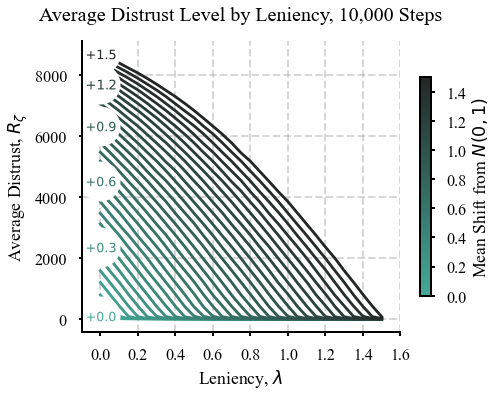

In [7]:
with graph_code.paper_theme():

    fig, ax1 = plt.subplots(1, 1, figsize=(width, 0.75*width))

    ax1 = sns.lineplot(data=results, 
        x='Leniency, $\lambda$', 
        y = 'Average Distrust, $R_{\zeta}$', 
        hue='Distribution',
        ax=ax1,
        legend=False,
        palette=sns.dark_palette(graph_code.tol_muted[2], reverse=True, as_cmap=True)
        )
        

    ax1.set_xlim(-0.1,1.6)

    labels = distribution_shift
    lines = ax1.get_lines()
    line_idx_label = np.linspace(0, len(lines)-1, 6)

    for x in [0]:
        y2 = []
        for l_idx, (line, label) in enumerate(zip(lines, labels)):
            if not l_idx in line_idx_label:
                continue
            y = line.get_ydata()[x]
            color = line.get_color()

            ax1.plot(
                leniency_list[x], 
                y, 
                'o', 
                color='white', 
                markersize=40,
                )
            ax1.plot(
                leniency_list[x], 
                y,
                marker="$+{:.1f}$".format(label), 
                color=color,
                markersize=30,
                )

    norm = plt.Normalize(
        results['Distribution'].min(), 
        results['Distribution'].max(),
        )
    sm = plt.cm.ScalarMappable(
        cmap=sns.dark_palette(graph_code.tol_muted[2], reverse=True, as_cmap=True),
        norm=norm,
        )
    sm.set_array([])
    cbar = ax1.figure.colorbar(sm, shrink=0.75)
    cbar.set_label('Mean Shift from $N(0,1)$', rotation=90, x=0.5)

    ax1.set_title(
        'Average Distrust Level by Leniency, {:,} Steps'.format(steps),
        fontsize=20,
        y=1.05
        )

    fig.set_size_inches(width, 0.75*width)

file_name = output_path + 'average_trust_vs_strictness'
graph_code.save_fig(fig, file_name=file_name)

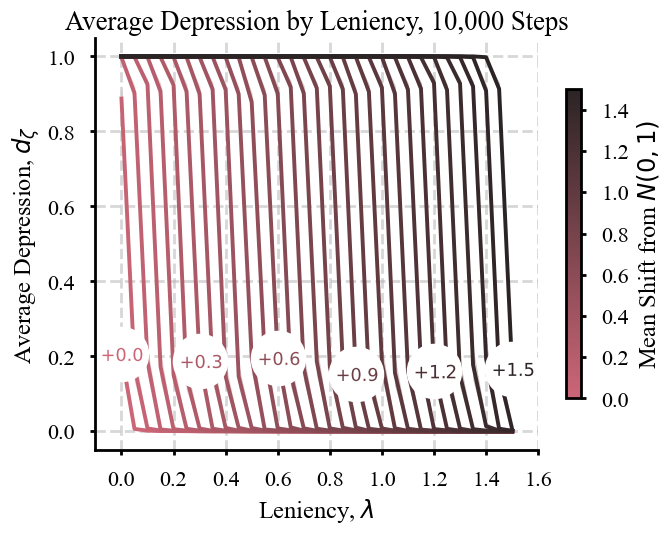

In [8]:
with graph_code.paper_theme():

    fig, ax2 = plt.subplots(1, 1, figsize=(width, 0.75*width))

    ax2 = sns.lineplot(data=depression, 
        x='Leniency, $\lambda$', 
        y = 'Average Depression, $d_{\zeta}$', 
        hue='Distribution',
        ax=ax2,
        legend=False,
        palette=sns.dark_palette(graph_code.tol_muted[6], reverse=True, as_cmap=True)
        )
            
    labels = distribution_shift
    lines = ax2.get_lines()
    line_idx_label = np.linspace(0, len(lines)-1, 6)

    for x in [15]:
        y2 = []
        for l_idx, (line, label) in enumerate(zip(lines, labels)):
            if not l_idx in line_idx_label:
                continue
            y = line.get_ydata()[l_idx]
            color = line.get_color()

            ax2.plot(leniency_list[l_idx], y, 'o', color='white', markersize=40)
            ax2.plot(leniency_list[l_idx], y, 
                marker="$+{:.1f}$".format(label), color=color, markersize=30)
    ax2.set_xlim(-0.1,1.6)
    norm = plt.Normalize(
        depression['Distribution'].min(), depression['Distribution'].max())
    sm = plt.cm.ScalarMappable(
        cmap=sns.dark_palette(graph_code.tol_muted[6], reverse=True, as_cmap=True), norm=norm)
    sm.set_array([])
    cbar = ax2.figure.colorbar(sm, shrink=0.75)
    cbar.set_label('Mean Shift from $N(0,1)$', rotation=90, x=0.5)

    ax2.set_title('Average Depression by Leniency, {:,} Steps'.format(steps))

    fig.set_size_inches(width, 0.75*width)

file_name = output_path + 'average_depression_vs_strictness'
graph_code.save_fig(fig, file_name=file_name)

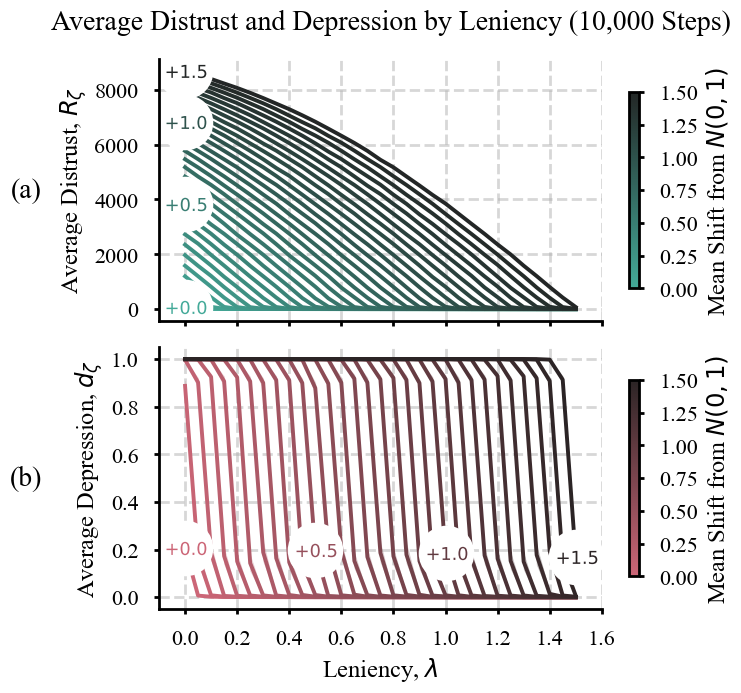

In [9]:
with graph_code.paper_theme():
    fig, axes = plt.subplots(2, 1, figsize=(width, 1*width))

    ax1, ax2 = axes

    ax1 = sns.lineplot(data=results, 
        x='Leniency, $\lambda$', 
        y = 'Average Distrust, $R_{\zeta}$', 
        hue='Distribution',
        ax=ax1,
        legend=False,
        palette=sns.dark_palette(graph_code.tol_muted[2], reverse=True, as_cmap=True)
        )
        

    ax1.set_xlim(-0.1,1.6)
    ax1.set_xlabel('')
    ax1.set_xticklabels([])

    labels = distribution_shift
    lines = ax1.get_lines()
    line_idx_label = np.linspace(0, len(lines)-1, 4)

    for x in [0]:
        y2 = []
        for l_idx, (line, label) in enumerate(zip(lines, labels)):
            if not l_idx in line_idx_label:
                continue
            y = line.get_ydata()[x]
            color = line.get_color()

            ax1.plot(
                leniency_list[x], 
                y, 
                'o', 
                color='white', 
                markersize=40,
                )
            ax1.plot(
                leniency_list[x], 
                y,
                marker="$+{:.1f}$".format(label), 
                color=color,
                markersize=30,
                )

    norm = plt.Normalize(
        results['Distribution'].min(), 
        results['Distribution'].max(),
        )
    sm = plt.cm.ScalarMappable(
        cmap=sns.dark_palette(graph_code.tol_muted[2], reverse=True, as_cmap=True),
        norm=norm,
        )
    sm.set_array([])
    cbar = ax1.figure.colorbar(sm, shrink=0.75, ax=ax1)
    cbar.set_label('Mean Shift from $N(0,1)$', rotation=90, x=0.5)

    #ax1.set_title(
    #    'Average Distrust Level by Leniency, {:,} Steps'.format(steps),
    #    fontsize=20,
    #    y=1.05
    #    )
    

    ax2 = sns.lineplot(data=depression, 
        x='Leniency, $\lambda$', 
        y = 'Average Depression, $d_{\zeta}$', 
        hue='Distribution',
        ax=ax2,
        legend=False,
        palette=sns.dark_palette(graph_code.tol_muted[6], reverse=True, as_cmap=True)
        )
            
    labels = distribution_shift
    lines = ax2.get_lines()
    line_idx_label = np.linspace(0, len(lines)-1, 4)

    for x in [15]:
        y2 = []
        for l_idx, (line, label) in enumerate(zip(lines, labels)):
            if not l_idx in line_idx_label:
                continue
            y = line.get_ydata()[l_idx]
            color = line.get_color()

            ax2.plot(leniency_list[l_idx], y, 'o', color='white', markersize=40)
            ax2.plot(leniency_list[l_idx], y, 
                marker="$+{:.1f}$".format(label), color=color, markersize=30)
    ax2.set_xlim(-0.1,1.6)
    norm = plt.Normalize(
        depression['Distribution'].min(), depression['Distribution'].max())
    sm = plt.cm.ScalarMappable(
        cmap=sns.dark_palette(graph_code.tol_muted[6], reverse=True, as_cmap=True), norm=norm)
    sm.set_array([])
    cbar = ax2.figure.colorbar(sm, shrink=0.75, ax=ax2)
    cbar.set_label('Mean Shift from $N(0,1)$', rotation=90, x=0.5)

    #ax2.set_title('Average Depression by Leniency, {:,} Steps'.format(steps))

    for nax, ax in enumerate(axes):
        ax.text(
            x=-0.3, y=0.5, 
            s=['(a)', '(b)',][nax], 
            va='center', 
            ha='center',
            transform=ax.transAxes,
            fontsize=20,
            )

    fig.subplots_adjust(hspace=0.1)
    fig.suptitle(
        f'Average Distrust and Depression by Leniency ({steps:,} Steps)',
        x=0.45,
        y=0.95,
        fontsize=20,
        )

file_name = output_path + 'distrust_depression_leniency'
graph_code.save_fig(fig, file_name)

## CIFAR-10 Conv3Net:

In [10]:
test_path = './outputs/synthetic_results/'

lap_n_dict = {
            'lap_n_25': 'LAP Model (Ours)',
            'lap_n_20': 'LAP Model (Ours), LAPN 20',
            'lap_n_50': 'LAP Model (Ours), LAPN 50',
        }

run_model_map = functools.partial(graph_code.run_model_map, lap_n_dict=lap_n_dict)

experiment_dict = {
    'Original\nData' : [
        'Conv3Net-no_c-drstd-results.csv'
        ],
    'Chunk\nShuffle' : [
        'Conv3Net-c_cs-drstd-results.csv', 'Conv3Net-c_cs_srb-drstd-results.csv'
        ],
    'Random\nLabel' : [
        'Conv3Net-c_rl-drstd-results.csv', 'Conv3Net-c_rl_srb-drstd-results.csv'
        ],
    'Batch\nLabel\nShuffle' : [
        'Conv3Net-c_lbs-drstd-results.csv', 'Conv3Net-c_lbs_srb-drstd-results.csv'
        ],
    'Batch\nLabel\nFlip' : [
        'Conv3Net-c_lbf-drstd-results.csv', 'Conv3Net-c_lbf_srb-drstd-results.csv'
        ],
    'Added\nNoise' : [
        'Conv3Net-c_ns-drstd-results.csv', 'Conv3Net-c_ns_srb-drstd-results.csv'
        ],
    'Replace\nWith\nNoise' : [
        'Conv3Net-c_no-drstd-results.csv', 'Conv3Net-c_no_srb-drstd-results.csv'
        ],
    }

results = pd.DataFrame()
for experiment, files in experiment_dict.items():
    for file in files:
        results_temp = pd.read_csv(os.path.join(test_path, file))
        results_temp['Corruption Type'] = experiment
        results = pd.concat([results, results_temp])
    results = graph_code.expand_run_names(results)
    results['Model Name'] = results['Run'].map(run_model_map)

In [11]:
## federated learning results
fed_arfl_folder = os.path.join(test_path, 'baseline', 'cifar10')
tbl = graph_code.TensorboardLoad(fed_arfl_folder, level=1)

In [12]:
fed_arfl_results = tbl.scalars(tags='weighted_average_test_results_accuracy')[1]

fed_arfl_results = (fed_arfl_results
.drop(['run', 'level_0', 'level_1', 'level_2', 'level_3', 'level_4'], axis=1)
.rename(
    {'level_5': 'Run', 'value': 'Value', 'step': 'Step', 'tag': 'Metric'},
    axis=1)
)
fed_arfl_results = graph_code.expand_run_names(fed_arfl_results)
fed_arfl_results = fed_arfl_results.query("Step == 9024")[['Run', 'Value', 'Seed']]
fed_arfl_results['Corruption Type'] = fed_arfl_results['Run'].map(graph_code.run_corrupt_map)
fed_arfl_results['Model Name'] = 'Fed ARFL'

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 70/70 [00:02<00:00, 31.73it/s]


In [13]:
model_order = [
                'Standard Model',
                'Fed ARFL',
                #'Corruption Oracle',
                'LAP Model (Ours)',
                ]

palette = {
    'Standard Model': '#648eff', 
    'LAP Model (Ours)': '#fd6000', 
    #'Corruption Oracle': '#dc267f', 
    'Fed ARFL': "#785ef0",
    }

In [14]:
data_plot_cifar10 = results[
                    (results['Metric'].isin(['Accuracy']))
                    & (results['Number of Epochs'] == '25')
                    & (results['Number of Corrupt Sources'].isin(['0', '4']))
                    & (results['LAP N'].isin(['20', '25', '50']))
                    & (results['Depression Strength'].isin(['0.0', '1.0']))
                    & (results['Strictness'].isin(['0.8']))
                    ].copy()

data_plot_cifar10 = pd.concat([data_plot_cifar10, fed_arfl_results])
data_plot_cifar10['Accuracy (%)'] = 100*data_plot_cifar10['Value']

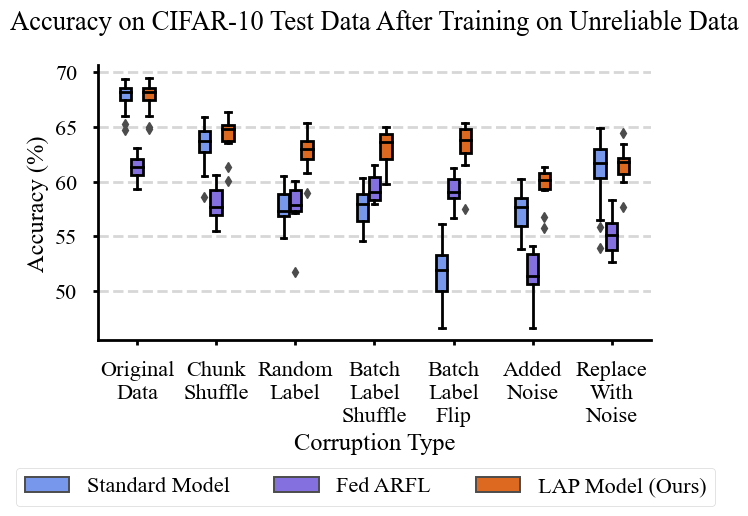

In [15]:
with graph_code.paper_theme():

    fig, ax = plt.subplots(1,1, figsize=(width,width/2))

    ax = graph_code.boxplot(
        data=data_plot_cifar10, 
        x='Corruption Type', 
        hue='Model Name', 
        y='Accuracy (%)', 
        hue_order=model_order, 
        showfliers=True,
        width=0.45,
        palette=palette,
        )
    ax.legend([],[], frameon=False)

    ax.set_title('Accuracy on CIFAR-10 Test Data After Training on Unreliable Data', y = 1.1)
    fig.legend(
        loc='center', 
        ncol=3, 
        bbox_to_anchor=[0.5, -0.3],
        bbox_transform=fig.transFigure
        )


## CIFAR-100 Conv3Net:

In [16]:
test_path = './outputs/synthetic_results/'

lap_n_dict = {
            'lap_n_25': 'LAP Model (Ours)',
            'lap_n_20': 'LAP Model (Ours), LAPN 20',
            'lap_n_50': 'LAP Model (Ours), LAPN 50',
        }

run_model_map = functools.partial(graph_code.run_model_map, lap_n_dict=lap_n_dict)

experiment_dict = {
    'Original\nData' : [
        'Conv3Net_100-no_c-drstd-results.csv'
        ],
    'Chunk\nShuffle' : [
        'Conv3Net_100-c_cs-drstd-results.csv', 'Conv3Net_100-c_cs_srb-drstd-results.csv'
        ],
    'Random\nLabel' : [
        'Conv3Net_100-c_rl-drstd-results.csv', 'Conv3Net_100-c_rl_srb-drstd-results.csv'
        ],
    'Batch\nLabel\nShuffle' : [
        'Conv3Net_100-c_lbs-drstd-results.csv', 'Conv3Net_100-c_lbs_srb-drstd-results.csv'
        ],
    'Batch\nLabel\nFlip' : [
        'Conv3Net_100-c_lbf-drstd-results.csv', 'Conv3Net_100-c_lbf_srb-drstd-results.csv'
        ],
    'Added\nNoise' : [
        'Conv3Net_100-c_ns-drstd-results.csv', 'Conv3Net_100-c_ns_srb-drstd-results.csv'
        ],
    'Replace\nWith\nNoise' : [
        'Conv3Net_100-c_no-drstd-results.csv', 'Conv3Net_100-c_no_srb-drstd-results.csv'
        ],
    }

results = pd.DataFrame()
for experiment, files in experiment_dict.items():
    for file in files:
        results_temp = pd.read_csv(os.path.join(test_path, file))
        results_temp['Corruption Type'] = experiment
        results = pd.concat([results, results_temp])
    results = graph_code.expand_run_names(results)
    results['Model Name'] = results['Run'].map(run_model_map)

In [17]:
## federated learning results
fed_arfl_folder = os.path.join(test_path, 'baseline', 'cifar100')
tbl = graph_code.TensorboardLoad(fed_arfl_folder, level=1)

In [18]:
fed_arfl_results = tbl.scalars(tags='weighted_average_test_results_top_5_acc')[1]

fed_arfl_results = (fed_arfl_results
.drop(['run', 'level_0', 'level_1', 'level_2', 'level_3', 'level_4'], axis=1)
.rename(
    {'level_5': 'Run', 'value': 'Value', 'step': 'Step', 'tag': 'Metric'},
    axis=1)
)
fed_arfl_results = graph_code.expand_run_names(fed_arfl_results)
fed_arfl_results = fed_arfl_results.query("Step == 14664")[['Run', 'Value', 'Seed']]
fed_arfl_results['Corruption Type'] = fed_arfl_results['Run'].map(graph_code.run_corrupt_map)
fed_arfl_results['Model Name'] = 'Fed ARFL'

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 70/70 [00:00<00:00, 121.46it/s]


In [19]:
model_order = [
                'Standard Model',
                'Fed ARFL',
                #'Corruption Oracle',
                'LAP Model (Ours)',
                ]

palette = {
    'Standard Model': '#648eff', 
    'LAP Model (Ours)': '#fd6000', 
    #'Corruption Oracle': '#dc267f', 
    'Fed ARFL': "#785ef0",
    }

In [20]:
data_plot_cifar100 = results[
                    (results['Metric'].isin(['Top 5 Accuracy']))
                    & (results['Number of Epochs'] == '40')
                    & (results['Number of Corrupt Sources'].isin(['2']))
                    & (results['LAP N'].isin(['25']))
                    & (results['Depression Strength'].isin(['0.0', '1.0']))
                    & (results['Strictness'].isin(['0.8']))
                    ].copy()

data_plot_cifar100 = pd.concat([data_plot_cifar100, fed_arfl_results])
data_plot_cifar100['Top 5 Accuracy (%)'] = 100*data_plot_cifar100['Value']

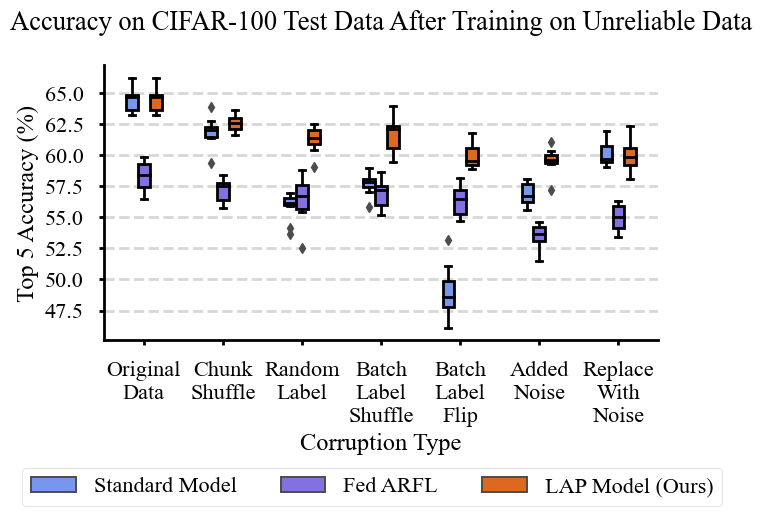

In [21]:
with graph_code.paper_theme():

    fig, ax = plt.subplots(1,1, figsize=(width,width/2))

    ax = graph_code.boxplot(
        data=data_plot_cifar100, 
        x='Corruption Type', 
        hue='Model Name', 
        y='Top 5 Accuracy (%)', 
        hue_order=model_order, 
        showfliers=True,
        width=0.45,
        palette=palette,
        )
    ax.legend([],[], frameon=False)

    ax.set_title('Accuracy on CIFAR-100 Test Data After Training on Unreliable Data', y = 1.1)
    fig.legend(
        loc='center', 
        ncol=3, 
        bbox_to_anchor=[0.5, -0.3],
        bbox_transform=fig.transFigure
        )


## F-MNIST:

In [22]:
test_path = './outputs/synthetic_results/'

lap_n_dict = {
            'lap_n_25': 'LAP Model (Ours), LAPN 25',
            'lap_n_20': 'LAP Model (Ours), LAPN 20',
            'lap_n_50': 'LAP Model (Ours)',
        }

run_model_map = functools.partial(graph_code.run_model_map, lap_n_dict=lap_n_dict)

experiment_dict = {
    'Original\nData' :  ['MLP-no_c-drstd-results.csv'],
    'Chunk\nShuffle' : ['MLP-c_cs-drstd-results.csv', 'MLP-c_cs_srb-drstd-results.csv'],
    'Random\nLabel' : ['MLP-c_rl-drstd-results.csv', 'MLP-c_rl_srb-drstd-results.csv'],
    'Batch\nLabel\nShuffle' : ['MLP-c_lbs-drstd-results.csv', 'MLP-c_lbs_srb-drstd-results.csv'],
    'Batch\nLabel\nFlip' : ['MLP-c_lbf-drstd-results.csv', 'MLP-c_lbf_srb-drstd-results.csv'],
    'Added\nNoise' : ['MLP-c_ns-drstd-results.csv', 'MLP-c_ns_srb-drstd-results.csv'],
    'Replace\nWith\nNoise' : ['MLP-c_no-drstd-results.csv', 'MLP-c_no_srb-drstd-results.csv'],
    }

results = pd.DataFrame()
for experiment, files in experiment_dict.items():
    for file in files:
        results_temp = pd.read_csv(os.path.join(test_path, file))
        results_temp['Corruption Type'] = experiment
        results = pd.concat([results, results_temp])
    results = graph_code.expand_run_names(results)
    results['Model Name'] = results['Run'].map(run_model_map)

In [23]:
## federated learning results
fed_arfl_folder = os.path.join(test_path, 'baseline', 'fmnist')
tbl = graph_code.TensorboardLoad(fed_arfl_folder, level=1)

In [24]:
fed_arfl_results = tbl.scalars(tags='weighted_average_test_results_accuracy')[1]

fed_arfl_results = (fed_arfl_results
.drop(['run', 'level_0', 'level_1', 'level_2', 'level_3', 'level_4'], axis=1)
.rename(
    {'level_5': 'Run', 'value': 'Value', 'step': 'Step', 'tag': 'Metric'},
    axis=1)
)
fed_arfl_results = graph_code.expand_run_names(fed_arfl_results)
fed_arfl_results = fed_arfl_results.query("Step == 14664")[['Run', 'Value', 'Seed']]
fed_arfl_results['Corruption Type'] = fed_arfl_results['Run'].map(graph_code.run_corrupt_map)
fed_arfl_results['Model Name'] = 'Fed ARFL'

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 70/70 [00:00<00:00, 190.21it/s]


In [25]:
model_order = [
                'Standard Model',
                'Fed ARFL',
                #'Corruption Oracle',
                'LAP Model (Ours)',
                ]

palette = {
    'Standard Model': '#648eff', 
    'LAP Model (Ours)': '#fd6000', 
    #'Corruption Oracle': '#dc267f', 
    'Fed ARFL': "#785ef0",
    }

In [26]:
data_plot_fmnist = results[
                    (results['Metric'].isin(['Accuracy']))
                    & (results['Number of Epochs'] == '40')
                    & (results['Number of Corrupt Sources'].isin(['0', '6']))
                    & (results['LAP N'].isin(['20', '25', '50']))
                    & (results['Depression Strength'].isin(['0.0', '1.0']))
                    & (results['Strictness'].isin(['0.8']))
                    ].copy()

data_plot_fmnist = pd.concat([data_plot_fmnist, fed_arfl_results])
data_plot_fmnist['Accuracy (%)'] = 100*data_plot_fmnist['Value']

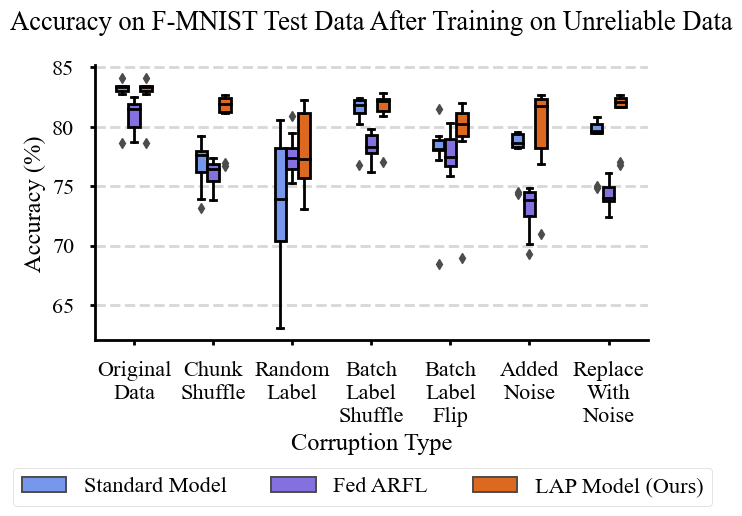

In [27]:
with graph_code.paper_theme():

    fig, ax = plt.subplots(1,1, figsize=(width,width/2))

    ax = graph_code.boxplot(
        data=data_plot_fmnist, 
        x='Corruption Type', 
        hue='Model Name', 
        y='Accuracy (%)', 
        hue_order=model_order, 
        showfliers=True,
        width=0.45,
        palette=palette,
        )
    ax.legend([],[], frameon=False)

    ax.set_title('Accuracy on F-MNIST Test Data After Training on Unreliable Data', y = 1.1)
    fig.legend(
        loc='center', 
        ncol=3, 
        bbox_to_anchor=[0.5, -0.3],
        bbox_transform=fig.transFigure
        )

## All Together:

In [28]:
data_plot_cifar10['Dataset'] = 'CIFAR-10'
data_plot_cifar100['Dataset'] = 'CIFAR-100'
data_plot_fmnist['Dataset'] = 'F-MNIST'

data_plot_cifar100['Accuracy (%)'] = data_plot_cifar100['Top 5 Accuracy (%)']

In [29]:
data_plot = pd.concat([data_plot_cifar10, data_plot_cifar100, data_plot_fmnist])

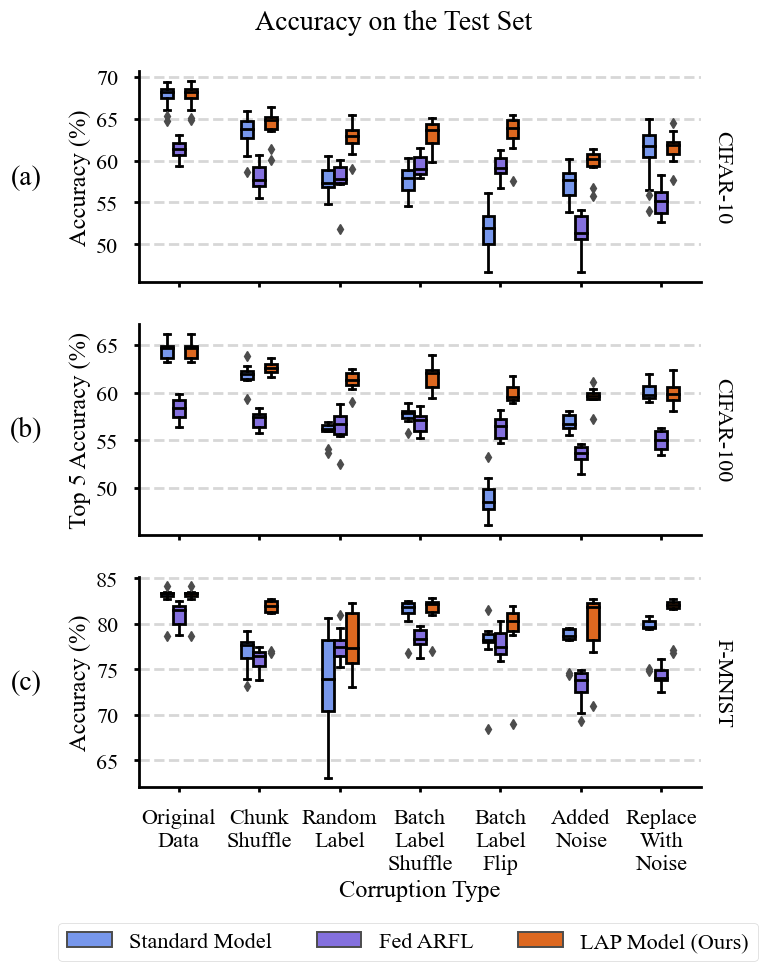

In [30]:
with graph_code.paper_theme():

    g = sns.FacetGrid(
        data=data_plot,
        row='Dataset',
        margin_titles=True,
        aspect=0.8,
        height=width/0.8,
        sharey=False,
        legend_out=False
        )

    g.map_dataframe(
        graph_code.boxplot,
        x='Corruption Type', 
        hue='Model Name', 
        y='Accuracy (%)', 
        hue_order=model_order, 
        showfliers=True,
        width=0.45,
        palette=palette,
            )

    g.set_titles(
        row_template="{row_name}",
        size=16,
        )

    g.fig.subplots_adjust(top=0.85, hspace=0.2)

    g.fig.suptitle(
        'Accuracy on the Test Set',
        fontsize=20,
        y=0.92
        )

    for nax, (row_val, ax) in enumerate(g.axes_dict.items()):
        ax.text(
            x=-0.2, y=0.5, 
            s=['(a)', '(b)', '(c)'][nax], 
            va='center', 
            ha='center',
            transform=ax.transAxes,
            fontsize=20,
            )
        if row_val == 'CIFAR-100':
            ax.set_ylabel('Top 5 Accuracy (%)')

    g.add_legend(
        loc='center', 
        ncol=3, 
        bbox_to_anchor=[0.52, -0.125],
        bbox_transform=g.figure.transFigure
        )

    g.fig.set_size_inches(width, width*1.25)

file_name = output_path + 'accuracy_results_complete_final'
graph_code.save_fig(g.figure, file_name)

## H-Params

In [31]:
results_dir = './outputs/synthetic_different_noise_results/'

In [32]:
corruption_names = {
    'c_cs': 'Chunk Shuffle',
    'c_rl': 'Random Label',
    'c_lbs': 'Batch Label Shuffle',
    'c_lbf': 'Batch Label Flip',
    'c_ns': 'Added Noise',
    'c_no': 'Replace With Noise',
    }

model_name = {
    0.0: 'Standard Model',
    1.0: 'LAP Model - Ours'
}

In [33]:
file_names = [
    results_dir + file_name 
    for file_name in os.listdir(results_dir) 
    if '.csv' in file_name
    ]

In [34]:
results = pd.DataFrame()
for file_name in file_names:
    results = pd.concat([
        results,
        pd.read_csv(file_name, index_col=0)
    ])

results = (results
    .query(
        "Metric.str.contains('test_accuracy') "\
        )
    )

results['Corruption Level'] = results['Corruption level'].apply(lambda x: float(eval(x)[0]))
results = results.rename({'LAP N': 'History Length'}, axis=1)
results = results.drop('Corruption level', axis=1)

In [35]:
experiment_ds = "`Depression Strength` in [0.1, 0.25, 0.5, 1.0] "\
    "& Strictness == 0.8 "\
    "& `History Length` == 25 "

experiment_str = "`Depression Strength` == 1.0 "\
    "& Strictness in [0.2, 0.4, 0.8, 1.6] "\
    "& `History Length` == 25 "

experiment_hl = "`Depression Strength` == 1.0 "\
    "& Strictness == 0.8 "\
    "& `History Length` in [1, 5, 25, 50] "

experiment_ds = (results
    .query(experiment_ds)
    .drop_duplicates(
        subset=[
            'Seed', 
            'Depression Strength', 
            'Strictness', 
            'History Length', 
            'Corruption Level',
            ]
        )
    .reset_index(drop=True)
    .assign(hparam='Depression Strength')
    )

experiment_str = (results
    .query(experiment_str)
    .drop_duplicates(
        subset=[
            'Seed', 
            'Depression Strength', 
            'Strictness', 
            'History Length', 
            'Corruption Level',
            ]
        )
    .reset_index(drop=True)
    .assign(hparam='Strictness')
    )

experiment_hl = (results
    .query(experiment_hl)
    .drop_duplicates(
        subset=[
            'Seed', 
            'Depression Strength', 
            'Strictness', 
            'History Length', 
            'Corruption Level',
            ]
        )
    .reset_index(drop=True)
    .assign(hparam='History Length')
    )

data_plot = pd.concat([experiment_ds, experiment_str, experiment_hl])
data_plot['Accuracy (%)'] = data_plot['Value']

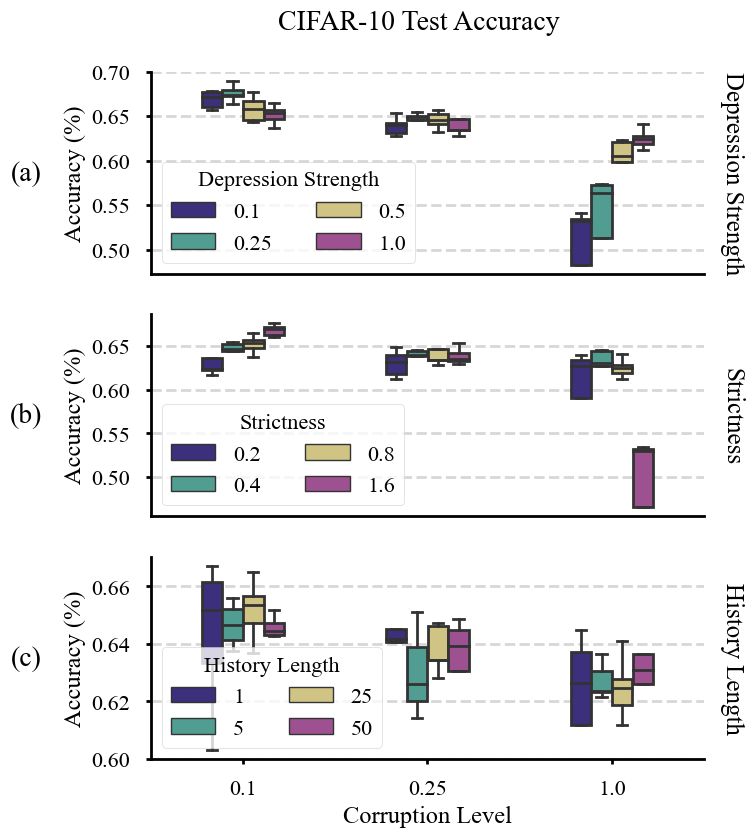

In [36]:

with graph_code.paper_theme():
    #fig = plt.figure(figsize=(width, width*0.75))
    #gs = gridspec.GridSpec(4, 4, figure=fig)

    fig, axes = plt.subplots(3,1,figsize=(width, width*1.25))
  

    boxplot_args = {
        'width':0.45, 
        'palette':graph_code.tol_muted,
        'linewidth':2,
        'showfliers':False,
        'palette': [graph_code.tol_muted[0], graph_code.tol_muted[2], graph_code.tol_muted[5], graph_code.tol_muted[8]]
        }

    ax1, ax2, ax3 = axes

    ax1 = sns.boxplot(
        data=experiment_ds,
        x='Corruption Level',
        y='Value',
        hue='Depression Strength',
        hue_order=[0.1, 0.25, 0.5, 1.0],
        ax=ax1,
        **boxplot_args,
        )

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(2)

    ax2 = sns.boxplot(
        data=experiment_str,
        x='Corruption Level',
        y='Value',
        hue='Strictness',
        hue_order=[0.2, 0.4, 0.8, 1.6],
        ax=ax2,
        **boxplot_args,
        )

    for axis in ['bottom','left']:
        ax2.spines[axis].set_linewidth(2)


    ax3 = sns.boxplot(
        data=experiment_hl,
        x='Corruption Level',
        y='Value',
        hue='History Length',
        hue_order=[1, 5, 25, 50],
        ax=ax3,
        **boxplot_args,
        )

    for axis in ['bottom','left']:
        ax3.spines[axis].set_linewidth(2)


    ax1.set_ylabel('Accuracy (%)')
    ax1.set_xticks([])
    ax1.set_xlabel('')
    ax1.legend(ncol=2, title='Depression Strength')

    ax2.tick_params('both',)
    #ax2.set_ylabel('Accuracy (%)')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_xticks([])
    ax2.set_xlabel('')
    ax2.legend(ncol=2, title='Strictness')

    ax3.tick_params('both',)
    ax3.set_xlabel('Source Corruption Level')
    #ax3.set_ylabel('Accuracy (%)')
    ax3.set_ylabel('Accuracy (%)')
    ax3.set_xlabel('Corruption Level')
    ax3.legend(ncol=2, title='History Length')


    for nax, ax in enumerate(axes):
        ax.text(
            x=-0.225, y=0.5, 
            s=['(a)', '(b)', '(c)'][nax], 
            va='center', 
            ha='center',
            transform=ax.transAxes,
            fontsize=20,
            )
        ax.text(
            x=1.05, y=0.5, 
            s=[
                'Depression Strength', 
                'Strictness', 
                'History Length'][nax], 
            va='center', 
            ha='center',
            transform=ax.transAxes,
            fontsize=18,
            rotation=270
            )

    fig.subplots_adjust(hspace=0.2)


    fig.suptitle('CIFAR-10 Test Accuracy', fontsize=20, y=0.95)
file_name = output_path + 'accuracy_hparam'
graph_code.save_fig(fig, file_name)

## Depression Values

In [37]:
def are_sources_corrupt(x):
    return (int(x) not in corrupt_sources_seed_2)

In [38]:
dep_tb = './runs/Conv3Net-c_rl-drstd-ns_10-ncs_4-ssize_128-ds_1.0'\
    '-stns_0.8-lap_n_25-ne_25-seed_2-dataset_cifar10'

tbl = graph_code.TensorboardLoad(dep_tb)

corrupt_sources_seed_2 = np.array([7,5,6,4])
data_plot_cor = tbl.scalars('Actual Depression Value')[1]
data_plot_cor = graph_code.clean_tb(data_plot_cor)

cor_name_mapping = {
    True: 'True (6 Sources)',
    False: 'False (4 Sources)',
    }

data_plot_cor['Reliable Source'] = (
    data_plot_cor
    ['Source']
    .apply(are_sources_corrupt)
    .map(cor_name_mapping)
    )

data_plot_cor['$1 - d_{\zeta}$  (%)'] = data_plot_cor['Value']

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 31/31 [00:00<00:00, 41.61it/s]


In [39]:
dep_tb = './runs/Conv3Net-c_rl_cfns-drstd-ns_10-ncs_4-ssize_128-ds_1.0'\
    '-stns_0.8-lap_n_25-ne_25-seed_2-dataset_cifar10'

tbl = graph_code.TensorboardLoad(dep_tb)

corrupt_sources_seed_2 = np.array([7,5,6,4])
data_plot_cor_nocor = tbl.scalars('Actual Depression Value')[1]
data_plot_cor_nocor = graph_code.clean_tb(data_plot_cor_nocor)

cor_name_mapping = {
    True: 'True (6 Sources)',
    False: 'False (4 Sources)',
    }

data_plot_cor_nocor['Reliable Source'] = (
    data_plot_cor_nocor
    ['Source']
    .apply(are_sources_corrupt)
    .map(cor_name_mapping)
    )

data_plot_cor_nocor['$1 - d_{\zeta}$  (%)'] = data_plot_cor_nocor['Value']

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 31/31 [00:00<00:00, 44.94it/s]


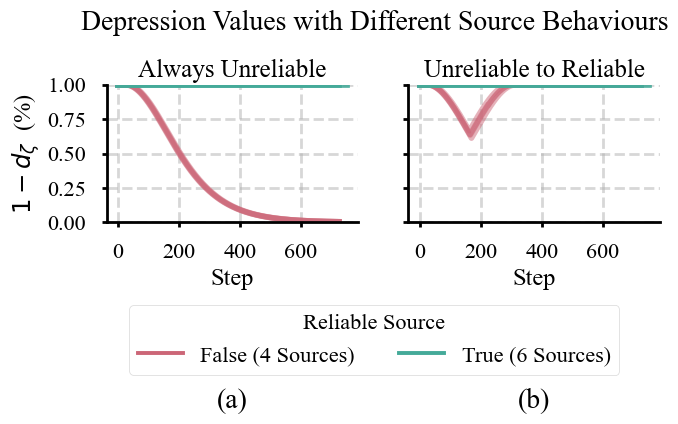

In [40]:
colour_map = {
    'True (6 Sources)': graph_code.tol_muted[2],
    'False (4 Sources)': graph_code.tol_muted[6],
    }

with graph_code.paper_theme():
    fig, axes = plt.subplots(1,2, figsize=(width, 0.25*width))
    ax1, ax2 = axes
    
    params = {
        'x': 'Step',
        'y': '$1 - d_{\zeta}$  (%)',
        'palette': colour_map,
        'units': 'Source',
        'hue': 'Reliable Source',
        'alpha': 0.5,
        'estimator': None,
        'linewidth': 4,
        'hue_order': ['False (4 Sources)', 'True (6 Sources)']
        }

    ax1 = sns.lineplot(
        data=data_plot_cor,
        ax=ax1,
        **params
        )

    ax2 = sns.lineplot(
        data=data_plot_cor_nocor,
        ax=ax2,
        **params
        )   
    
    ax1.set_title('Always Unreliable', fontsize=18)
    ax2.set_title('Unreliable to Reliable', fontsize=18)

    ax2.set_ylabel('')
    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_yticklabels([])

    fig.subplots_adjust(wspace=0.2)

    ax1.legend([],[], frameon=False)
    ax2.legend([],[], frameon=False)
    fig.legend(
        *ax1.get_legend_handles_labels(),
        loc='center', 
        ncol=2, 
        bbox_to_anchor=[0.5, -0.55],
        bbox_transform=fig.transFigure,
        title='Reliable Source',
        )


    for nax, ax in enumerate(axes):
        ax.text(
            x=0.5, y=-1.3, 
            s=['(a)', '(b)',][nax], 
            va='center', 
            ha='center',
            transform=ax.transAxes,
            fontsize=20,
            )
    
    fig.suptitle(
        'Depression Values with Different Source Behaviours', 
        fontsize=20,
        y=1.3,
        )
    
    fig.set_size_inches(width, 0.25*width)

    file_name = output_path + 'depression_behaviour_cifar_10_10_4_e_25_c_rl'
    graph_code.save_fig(fig, file_name)


## Loss at Beginning:

In [41]:
def are_sources_corrupt(x):
    return (int(x) not in corrupt_sources_seed_2)

In [42]:
loss_tb = './runs/Conv3Net_100-c_lbf-drstd-ns_10-ncs_2-ssize_128-ds_1.0'\
    '-stns_0.8-lap_n_25-ho_250-ne_40-seed_2-dataset_cifar100'

tbl = graph_code.TensorboardLoad(loss_tb)

In [43]:
loss_df = tbl.scalars('Training Source Loss')[1]
loss_df = graph_code.clean_tb(loss_df)

corrupt_sources_seed_2 = np.array([7,5])


cor_name_mapping = {
    True: 'True (8 Sources)',
    False: 'False (2 Sources)',
    }

loss_df['Reliable Source'] = (
    loss_df
    ['Source']
    .apply(are_sources_corrupt)
    .map(cor_name_mapping)
    )

loss_df['Loss'] = loss_df['Value']

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 31/31 [00:01<00:00, 27.31it/s]


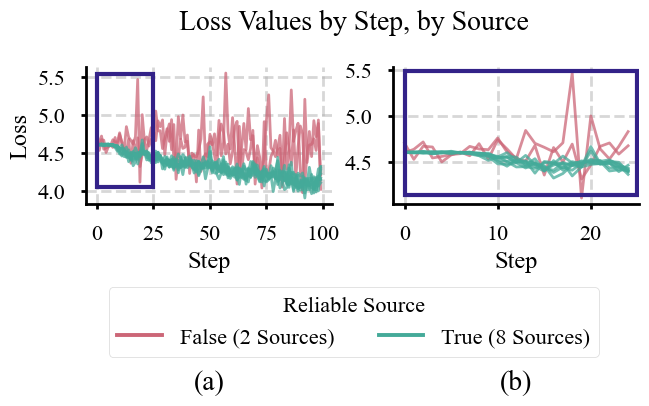

In [44]:
from matplotlib import patches

colour_map = {
    'True (8 Sources)': graph_code.tol_muted[2],
    'False (2 Sources)': graph_code.tol_muted[6],
    }

with graph_code.paper_theme():
    fig, axes = plt.subplots(1,2, figsize=(width, 0.25*width))
    ax1, ax2 = axes
    
    params = {
        'x': 'Step',
        'y': 'Loss',
        'palette': colour_map,
        'units': 'Source',
        'hue': 'Reliable Source',
        'alpha': 0.75,
        'estimator': None,
        'linewidth': 2,
        'hue_order': ['False (2 Sources)', 'True (8 Sources)']
        }

    ax1 = sns.lineplot(
        data=loss_df.query("Step<100"),
        ax=ax1,
        **params
        )

    ax2 = sns.lineplot(
        data=loss_df.query("Step<25"),
        ax=ax2,
        **params
        )   

    ##### make sure that the rectangle is on top!!!!!

    ax2.set_ylabel('')

    fig.subplots_adjust(wspace=0.25)

    ax1.legend([],[], frameon=False)
    ax2.legend([],[], frameon=False)
    fig.legend(
        *ax1.get_legend_handles_labels(),
        loc='center', 
        ncol=2, 
        bbox_to_anchor=[0.5, -0.55],
        bbox_transform=fig.transFigure,
        title='Reliable Source',
        )


    for nax, ax in enumerate(axes):
        ax.text(
            x=0.5, y=-1.3, 
            s=['(a)', '(b)',][nax], 
            va='center', 
            ha='center',
            transform=ax.transAxes,
            fontsize=20,
            )
    
    fig.suptitle(
        'Loss Values by Step, by Source', 
        fontsize=20,
        y=1.2,
        )
    
    y0, y1 = ax2.get_ylim()

    ax1.add_patch(
        patches.Rectangle(
            (0, y0),
            25,
            y1-y0,
            fill=False,
            edgecolor=graph_code.tol_muted[0],
            linewidth=3,
            zorder=2
            )
        )

    ax2.add_patch(
        patches.Rectangle(
            (0, y0+0.1),
            25-0.1,
            y1-y0-0.15,
            fill=False,
            edgecolor=graph_code.tol_muted[0],
            linewidth=3,
            zorder=2
            )
        )
    
    fig.set_size_inches(width, 0.25*width)

file_name = output_path + 'source_loss_cifar100'
graph_code.save_fig(fig, file_name)